In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data Preparation

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\train.csv\train.csv")

In [3]:
holiday_events=pd.read_csv(r"C:\Users\HP\Downloads\holidays_events.csv")

In [4]:
oil=pd.read_csv(r"C:\Users\HP\Downloads\oil.csv")

In [5]:
stores=pd.read_csv(r"C:\Users\HP\Downloads\stores.csv")

In [6]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
df = df.merge(stores, on ='store_nbr')
df = df.merge(oil, on ='date', how='left')
holiday_events = holiday_events.rename(columns={'type': 'holiday_type'})
df = df.merge(holiday_events, on='date', how='left')

In [11]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


Data Preprocessing

In [13]:
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type                  0
cluster               0
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

In [14]:
unwanted_cols=['holiday_type', 'locale', 'locale_name', 'description', 'transferred', 'dcoilwtico']

In [15]:
df=df.drop(columns=unwanted_cols)

In [17]:
df.duplicated().any()

True

In [18]:
duplicates=df.duplicated()
sum(duplicates)

53460

In [19]:
df=df.drop_duplicates()

In [20]:
df.duplicated().any()

False

In [21]:
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dtype: int64

In [22]:
df['date'] = pd.to_datetime(df['date'])


In [23]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


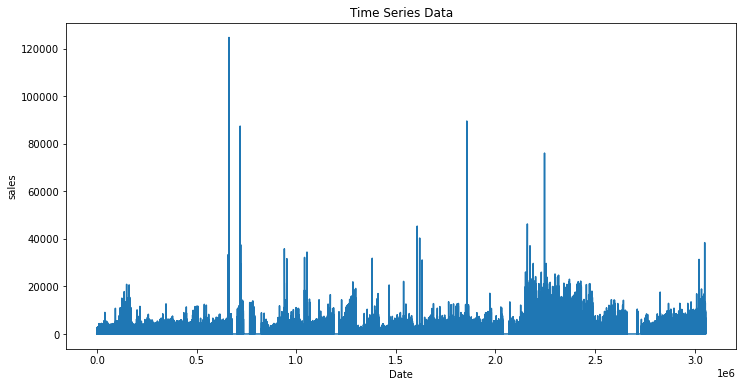

In [24]:
# Visualize the time series data.
plt.figure(figsize=(12, 6))
plt.plot(df['sales'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('sales')
plt.show()


In [26]:
# create new columns 'month' 'year'
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

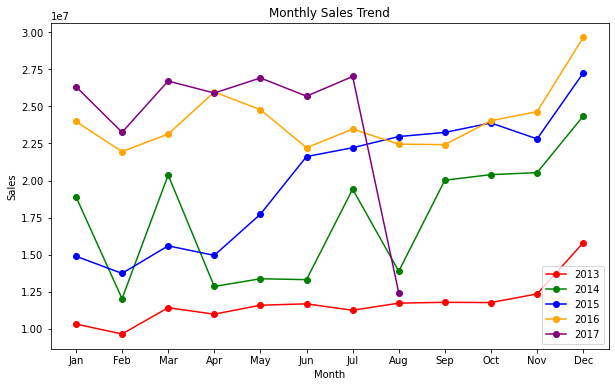

In [27]:
import itertools
# Group the data by month, year, and calculate the total sales
monthly_sales = df.groupby(['month', 'year'])['sales'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Get unique years and cycle through colors
years = monthly_sales['year'].unique()
colors = itertools.cycle(['red', 'green', 'blue', 'orange', 'purple'])

for year in years:
    year_data = monthly_sales[monthly_sales['year'] == year]
    plt.plot(year_data['month'], year_data['sales'], marker='o', color=next(colors), label=str(year))

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')

# Customize x-axis ticks to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)


plt.legend()

plt.show()

In [28]:
df = df.groupby('date')['sales','onpromotion'].sum().reset_index()
print(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_6636\1567527528.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby('date')['sales','onpromotion'].sum().reset_index()


           date          sales  onpromotion
0    2013-01-01    2511.618999            0
1    2013-01-02  496092.417944            0
2    2013-01-03  361461.231124            0
3    2013-01-04  354459.677093            0
4    2013-01-05  477350.121229            0
...         ...            ...          ...
1679 2017-08-11  826373.722022        14179
1680 2017-08-12  792630.535079         8312
1681 2017-08-13  865639.677471         9283
1682 2017-08-14  760922.406081         8043
1683 2017-08-15  762661.935939        10605

[1684 rows x 3 columns]


# Model Identification


In [29]:
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test.
result = sm.tsa.adfuller(df['sales'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f' Num of lags:{result[2]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -2.6161957486048566
p-value: 0.08969592175787472
 Num of lags:22
Critical Values:
   1%: -3.4342930672797065
   5%: -2.8632816397229064
   10%: -2.567697207194407


ADF Statistic: The ADF statistic is -2.6161957486048566. If the ADF statistic is less than the critical values, you can reject the null hypothesis. However, in this case, the ADF statistic is greater (closer to zero) than the critical values, indicating that you fail to reject the null hypothesis. This suggests that the time series data likely has a unit root and is non-stationary.

P-value: The p-value (0.08969592175787472) is greater than common significance levels (such as 0.01, 0.05, or 0.10). A higher p-value suggests weak evidence against the null hypothesis. In this case, the p-value is greater than 0.05 (at 5% significance level), indicating that you fail to reject the null hypothesis. Again, this supports the idea that the data is likely non-stationary.

In [30]:
#Differencing
df['sales_diff'] = df['sales'].diff().dropna()
print(df['sales_diff'])

0                 NaN
1       493580.798945
2      -134631.186820
3        -7001.554031
4       122890.444136
            ...      
1679    174986.810052
1680    -33743.186943
1681     73009.142392
1682   -104717.271390
1683      1739.529858
Name: sales_diff, Length: 1684, dtype: float64


In [31]:
df['sales_diff'] = df['sales'] - df['sales'].shift(1)

In [32]:
df = df.dropna()

In [33]:
df['sales_diff']

1       493580.798945
2      -134631.186820
3        -7001.554031
4       122890.444136
5        42345.279859
            ...      
1679    174986.810052
1680    -33743.186943
1681     73009.142392
1682   -104717.271390
1683      1739.529858
Name: sales_diff, Length: 1683, dtype: float64

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

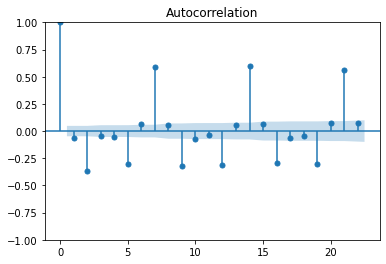

In [35]:
# ACF Plot
plot_acf(df['sales_diff'], lags=22)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


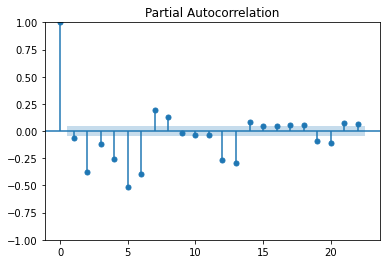

In [36]:
# PACF Plot
plot_pacf(df['sales_diff'], lags=22)
plt.show()

In [ ]:
#p=5, q=5

In [37]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [38]:
#to determine order of ARIMA using auto_arima method
stepwise_fit=auto_arima(df['sales'], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44438.403, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=45076.761, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=45072.132, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44904.914, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=45074.763, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44449.507, Time=0.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44455.475, Time=1.01 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=44454.551, Time=2.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=44393.763, Time=1.95 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=44471.792, Time=1.82 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=44063.119, Time=6.34 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=43829.214, Time=5.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=43868.993, Time=6.57 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=43783.482, Time=7.27 sec
 ARIMA(5,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1683
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -21753.106
Date:                Tue, 31 Oct 2023   AIC                          43528.213
Time:                        12:56:43   BIC                          43587.918
Sample:                             0   HQIC                         43550.327
                               - 1683                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0437      0.032     32.625      0.000       0.981       1.106
ar.L2         -1.6359      0.027    -61.685      0.000      -1.688      -1.584
ar.L3          1.1553      0.046     25.388      0.000       1.066       1.245
ar.L4         -1.1969      0.025    -46.994      0.000      -1.247      -1.147
ar.L5          0.2532      0.031      8.149      0.000       0.192       0.314
ma.L1         -1.5743      0.028    -55.369      0.000      -1.630      -1.519
ma.L2          1.9416      0.033     58.369      0.000       1.876       2.007
ma.L3         -1.7800      0.043    -41.443      0.000      -1.864      -1.696
ma.L4          1.4396      0.032     45.489      0.000       1.378       1.502
ma.L5         -0.7367      0.025    -29.147      0.000      -0.786      -0.687
sigma2      1.264e+10   7.45e-12    1.7e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             50420.17
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+36. Standard errors may be unstable.
"""

In [39]:
#p=5, d=1, q=5

In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [39]:
# Split the data into training and testing sets.
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]
print(train_data.shape, test_data.shape)

(1346, 4) (337, 4)


TRAIN THE MODEL

# Model Estimation

In [40]:
model = ARIMA(train_data['sales'], order=(5, 1, 5))
model=model.fit()
model.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1346
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -17234.967
Date:                Tue, 31 Oct 2023   AIC                          34491.933
Time:                        20:57:51   BIC                          34549.179
Sample:                             0   HQIC                         34513.376
                               - 1346                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1406      0.037     31.120      0.000       1.069       1.212
ar.L2         -1.7077      0.030    -56.845      0.000      -1.767      -1.649
ar.L3          1.2956      0.052     24.885      0.000       1.194       1.398
ar.L4         -1.2704      0.029    -43.385      0.000      -1.328      -1.213
ar.L5          0.3516      0.036      9.816      0.000       0.281       0.422
ma.L1         -1.5754      0.033    -47.090      0.000      -1.641      -1.510
ma.L2          1.9370      0.038     51.157      0.000       1.863       2.011
ma.L3         -1.7894      0.047    -38.412      0.000      -1.881      -1.698
ma.L4          1.4299      0.034     42.303      0.000       1.364       1.496
ma.L5         -0.7170      0.028    -25.577      0.000      -0.772      -0.662
sigma2      9.723e+09   1.56e-11   6.22e+20      0.000    9.72e+09    9.72e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20053.89
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.79e+36. Standard errors may be unstable.
"""

# Model Diagnostic and Residual Analysis

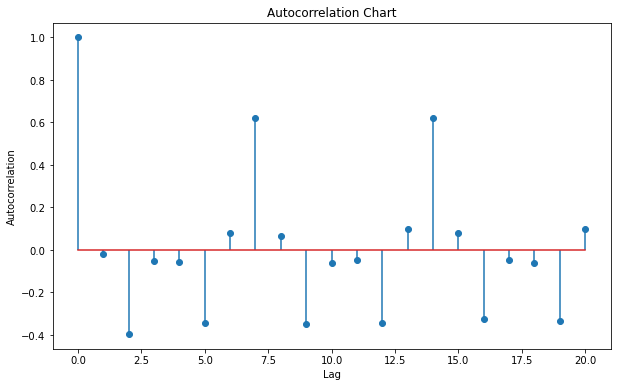

In [40]:
# Compute the autocorrelation
autocorrelation = sm.tsa.acf(train_data['sales_diff'], nlags=20)

# Plot the autocorrelation chart
plt.figure(figsize=(10, 6))
plt.stem(range(len(autocorrelation)), autocorrelation, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Chart')
plt.show()

In [67]:
ts = train_data['sales_diff']

In [69]:
# Perform the ADF test
result = sm.tsa.adfuller(ts)

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -8.913964240293112
p-value: 1.0852820354513177e-14


In this case, the ADF statistic is highly negative (
−
8.913964240293112
−8.913964240293112) and the p-value (
1.0852820354513177
×
1
0
−
14
1.0852820354513177×10 
−14
 ) is extremely small, much smaller than commonly used significance levels like 
0.01
0.01 or 
0.05
0.05. This small p-value indicates strong evidence against the null hypothesis. Therefore, you can reject the null hypothesis and conclude that the time series data is stationary.

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


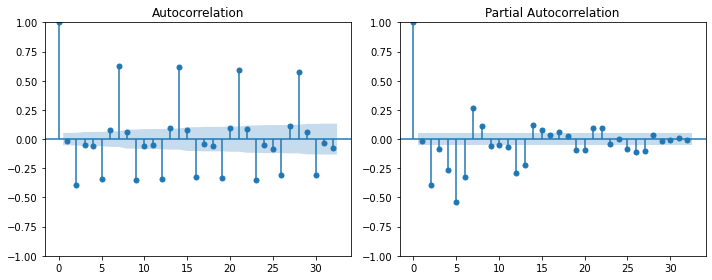

In [61]:
# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(121)
plot_acf(train_data['sales_diff'], ax=ax1)


# Plot the Partial Autocorrelation Function (PACF)
ax2 = plt.subplot(122)
plot_pacf(train_data['sales_diff'], ax=ax2)

plt.tight_layout()
plt.show()

In [43]:
df.set_index('date', inplace=True)

In [47]:
train_data

,sales,onpromotion,sales_diff
date,,,
2013-01-02,4.960924e+05,0,493580.798945
2013-01-03,3.614612e+05,0,-134631.186820
2013-01-04,3.544597e+05,0,-7001.554031
2013-01-05,4.773501e+05,0,122890.444136
2013-01-06,5.196954e+05,0,42345.279859
...,...,...,...
2016-09-07,7.385439e+05,12437,-13039.108073
2016-09-08,5.958493e+05,5757,-142694.618389
2016-09-09,6.589690e+05,11435,63119.728358


In [57]:
test_data

,date,sales,onpromotion,sales_diff
1347,2016-09-12,678776.459126,5902,-338592.765140
1348,2016-09-13,603427.946974,7836,-75348.512152
1349,2016-09-14,624262.071976,13238,20834.125002
1350,2016-09-15,568324.812986,8373,-55937.258990
1351,2016-09-16,691912.601466,14453,123587.788480
...,...,...,...,...
1679,2017-08-11,826373.722022,14179,174986.810052
1680,2017-08-12,792630.535079,8312,-33743.186943
1681,2017-08-13,865639.677471,9283,73009.142392
1682,2017-08-14,760922.406081,8043,-104717.271390


# Model Forecasting

In [42]:
index_dates=pd.date_range(start='2016-09-16', end='2017-08-18')
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred=model.predict(start=start, end=end, typ='levels')
pred.index=index_dates
print(pred)

2016-09-16    815039.393242
2016-09-17    754406.329274
2016-09-18    756147.480371
2016-09-19    679069.574977
2016-09-20    736352.936917
                  ...      
2017-08-14    731054.409042
2017-08-15    841323.445334
2017-08-16    876717.824423
2017-08-17    774733.896312
2017-08-18    773161.284382
Freq: D, Name: predicted_mean, Length: 337, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


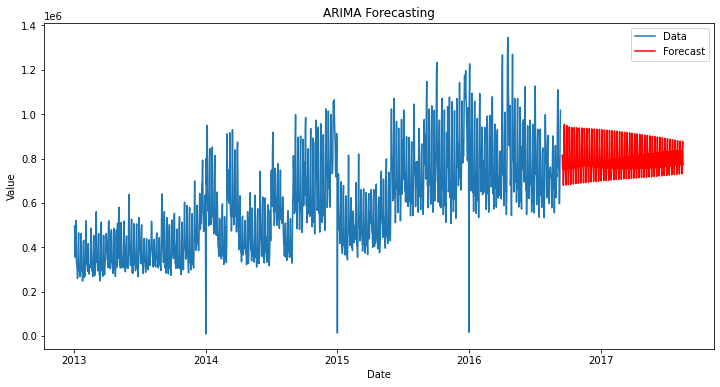

In [60]:
# Plot of forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train_data['sales'], label='Data')
plt.plot(pred, label='Forecast', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

In [51]:
#Retrain the model
model2=sm.tsa.ARIMA(df['sales'], order=(5, 1, 5))
model2=model2.fit()
model2.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1683
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -21753.106
Date:                Tue, 31 Oct 2023   AIC                          43528.213
Time:                        21:07:36   BIC                          43587.918
Sample:                             0   HQIC                         43550.327
                               - 1683                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0437      0.032     32.625      0.000       0.981       1.106
ar.L2         -1.6359      0.027    -61.685      0.000      -1.688      -1.584
ar.L3          1.1553      0.046     25.388      0.000       1.066       1.245
ar.L4         -1.1969      0.025    -46.994      0.000      -1.247      -1.147
ar.L5          0.2532      0.031      8.149      0.000       0.192       0.314
ma.L1         -1.5743      0.028    -55.369      0.000      -1.630      -1.519
ma.L2          1.9416      0.033     58.369      0.000       1.876       2.007
ma.L3         -1.7800      0.043    -41.443      0.000      -1.864      -1.696
ma.L4          1.4396      0.032     45.489      0.000       1.378       1.502
ma.L5         -0.7367      0.025    -29.147      0.000      -0.786      -0.687
sigma2      1.264e+10   7.45e-12    1.7e+21      0.000    1.26e+10    1.26e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             50420.17
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+36. Standard errors may be unstable.
"""

Forecasting future data

In [61]:
index_future_dates=pd.date_range(start='2017-08-18', end='2017-09-17')
print(index_future_dates)

pred2=model.predict(start=len(df), end=len(df)+30, typ='levels').rename('Arima_predictions')
pred2.index=index_future_dates
print(pred2)

DatetimeIndex(['2017-08-18', '2017-08-19', '2017-08-20', '2017-08-21',
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31', '2017-09-01', '2017-09-02',
               '2017-09-03', '2017-09-04', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08', '2017-09-09', '2017-09-10',
               '2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
               '2017-09-15', '2017-09-16', '2017-09-17'],
              dtype='datetime64[ns]', freq='D')
2017-08-18    836327.585320
2017-08-19    772736.715050
2017-08-20    732303.370252
2017-08-21    842758.568418
2017-08-22    874601.000314
2017-08-23    772901.329835
2017-08-24    774640.639202
2017-08-25    837017.854375
2017-08-26    771817.179988
2017-08-27    733576.163745
2017-08-28    844151.160914
2017-08-29    872467.670842
2017-08-30    771149.901633
2017-08-31    776150.180548
2017-

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


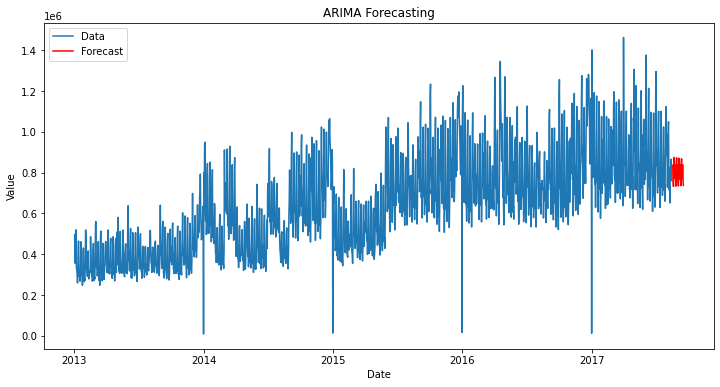

In [62]:
# Plot of forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df['sales'], label='Data')
plt.plot(pred2, label='Forecast', color='red')
plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Model Evaluation

Root Mean Square Error

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred, test_data['sales']))
print(rmse)

166537.09512012807


In [64]:
data_range =test_data['sales'].max() - test_data['sales'].min()
data_range

1451001.4614620002

In [65]:
rmse_value = 166537.095

if rmse_value < data_range:
    print("RMSE is smaller than the data range. Model predictions are relatively accurate.")
else:
    print("RMSE is comparable to or larger than the data range. Model predictions might not be very accurate.")


RMSE is smaller than the data range. Model predictions are relatively accurate.
